In [2]:
pwd

'C:\\Users\\clubc\\Desktop\\스마트팩토리 프로젝트\\process_anlaysis\\simulation_data_model'

In [3]:
import pandas as pd

In [4]:
dataset = pd.read_csv('./csv_data/2020_09_10_2107_1_elec89.99_temp489.99.csv')

In [5]:
dataset.head()

,item_key,body_length,body_width,body_height,wavyfin_length,wavyfin_width,wavyfin_height,op10_length,op10_width,op10_height,...,op50_height,op50_temperature,op50_process_time,op50_time_stamp,op60_test,op60_length,op60_width,op60_height,op60_process_time,op60_time_stamp
0,1,200.0,100.0,50.00,100.0,50.0,60.0,200.0,100,60.0,...,60.0,502.82,10,110,0,260.0,180.00,60.0,10,120
1,2,200.0,100.0,50.00,100.0,50.0,60.0,200.0,100,60.0,...,60.0,508.40,10,120,0,260.0,180.00,60.0,10,130
2,3,200.0,100.0,50.00,100.0,50.0,60.0,200.0,100,60.0,...,60.0,492.18,10,130,1,260.0,179.99,60.0,10,140
3,4,200.0,100.0,50.01,100.0,50.0,60.0,200.0,100,60.0,...,60.0,503.79,10,140,0,260.0,180.00,60.0,10,150
4,5,200.0,100.0,50.01,100.0,50.0,60.0,200.0,100,60.0,...,60.0,504.70,10,150,0,260.0,180.00,60.0,10,160


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14388 entries, 0 to 14387
Data columns (total 59 columns):
item_key                   14388 non-null int64
body_length                14388 non-null float64
body_width                 14388 non-null float64
body_height                14388 non-null float64
wavyfin_length             14388 non-null float64
wavyfin_width              14388 non-null float64
wavyfin_height             14388 non-null float64
op10_length                14388 non-null float64
op10_width                 14388 non-null int64
op10_height                14388 non-null float64
op10_electricity_sensor    14388 non-null float64
op10_process_time          14388 non-null int64
op10_test                  14388 non-null int64
op10_time_stamp            14388 non-null int64
pipe1_length               14388 non-null float64
pipe1_width                14388 non-null float64
pipe1_height               14388 non-null float64
op20_length                14388 non-null float64
o

In [20]:
X = dataset.drop(['op60_time_stamp', 'op60_process_time', 
                   'op60_height', 'op60_width', 'op60_length', 'op60_test', 
                   'op50_time_stamp', 'op50_process_time', 
                   'op50_height', 'op50_width', 'op50_length', 'op50_temperature',
                   'op40_time_stamp', 'op40_process_time', 
                   'op40_height', 'op40_width', 'op40_length', 'op40_temperature', 'op40_test',
                   'op30_time_stamp', 'op30_process_time', 
                   'op30_height', 'op30_width', 'op30_length', 'op30_electricity_sensor', 'op30_test',
                   'op20_time_stamp', 'op20_process_time', 
                   'op20_height', 'op20_width', 'op20_length', 'op20_electricity_sensor', 'op20_test',
                   'op10_time_stamp', 'op10_process_time', 
                   'op10_height', 'op10_width', 'op10_length', 'op10_electricity_sensor', 'op10_test',
                   'item_key'
                  ], axis = 1)
X.head()

,body_length,body_width,body_height,wavyfin_length,wavyfin_width,wavyfin_height,pipe1_length,pipe1_width,pipe1_height,pipe2_length,pipe2_width,pipe2_height,flange1_length,flange1_width,flange1_height,flange2_length,flange2_width,flange2_height
0,200.0,100.0,50.00,100.0,50.0,60.0,30.00,50.0,29.99,30.0,50.0,30.00,30,80,40,30.0,80.0,40.00
1,200.0,100.0,50.00,100.0,50.0,60.0,30.00,50.0,30.00,30.0,50.0,29.99,30,80,40,30.0,80.0,40.00
2,200.0,100.0,50.00,100.0,50.0,60.0,29.99,50.0,30.00,30.0,50.0,30.00,30,80,40,30.0,80.0,40.01
3,200.0,100.0,50.01,100.0,50.0,60.0,30.00,50.0,30.00,30.0,50.0,30.00,30,80,40,30.0,80.0,40.00
4,200.0,100.0,50.01,100.0,50.0,60.0,30.00,50.0,30.00,30.0,50.0,30.00,30,80,40,30.0,80.0,40.00


In [21]:
y = dataset['op60_test']
y.head()

0    0
1    0
2    1
3    0
4    0
Name: op60_test, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    shuffle=False, 
                                                    random_state=1004)

In [23]:
X_train.head()

,body_length,body_width,body_height,wavyfin_length,wavyfin_width,wavyfin_height,pipe1_length,pipe1_width,pipe1_height,pipe2_length,pipe2_width,pipe2_height,flange1_length,flange1_width,flange1_height,flange2_length,flange2_width,flange2_height
0,200.0,100.0,50.00,100.0,50.0,60.0,30.00,50.0,29.99,30.0,50.0,30.00,30,80,40,30.0,80.0,40.00
1,200.0,100.0,50.00,100.0,50.0,60.0,30.00,50.0,30.00,30.0,50.0,29.99,30,80,40,30.0,80.0,40.00
2,200.0,100.0,50.00,100.0,50.0,60.0,29.99,50.0,30.00,30.0,50.0,30.00,30,80,40,30.0,80.0,40.01
3,200.0,100.0,50.01,100.0,50.0,60.0,30.00,50.0,30.00,30.0,50.0,30.00,30,80,40,30.0,80.0,40.00
4,200.0,100.0,50.01,100.0,50.0,60.0,30.00,50.0,30.00,30.0,50.0,30.00,30,80,40,30.0,80.0,40.00


In [24]:
X_test.head()

,body_length,body_width,body_height,wavyfin_length,wavyfin_width,wavyfin_height,pipe1_length,pipe1_width,pipe1_height,pipe2_length,pipe2_width,pipe2_height,flange1_length,flange1_width,flange1_height,flange2_length,flange2_width,flange2_height
11510,200.00,100.0,50.0,100.0,50.0,60.0,30.0,50.0,30.0,30.0,50.0,30.0,30,80,40,30.0,79.99,40.0
11511,200.00,100.0,50.0,100.0,50.0,60.0,30.0,50.0,30.0,30.0,50.0,30.0,30,80,40,30.0,80.00,40.0
11512,200.00,100.0,50.0,100.0,50.0,60.0,30.0,50.0,30.0,30.0,50.0,30.0,30,80,40,30.0,80.00,40.0
11513,199.99,100.0,50.0,100.0,50.0,60.0,30.0,50.0,30.0,30.0,50.0,30.0,30,80,40,30.0,80.00,40.0
11514,200.00,100.0,50.0,100.0,50.0,60.0,30.0,50.0,30.0,30.0,50.0,30.0,30,80,40,30.0,80.00,40.0


In [25]:
y_train.head()

0    0
1    0
2    1
3    0
4    0
Name: op60_test, dtype: int64

In [26]:
y_test.head()

11510    0
11511    0
11512    0
11513    0
11514    0
Name: op60_test, dtype: int64

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [28]:
dt_clf = DecisionTreeClassifier(random_state = 11)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=11,
            splitter='best')

In [29]:
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도 : {0:.4f}'.format(accuracy))
print('DecisionTreeClassifier 기본 하이퍼 파라미터: \n', dt_clf.get_params())

결정 트리 예측 정확도 : 0.9826
DecisionTreeClassifier 기본 하이퍼 파라미터: 
 {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': 11, 'splitter': 'best'}


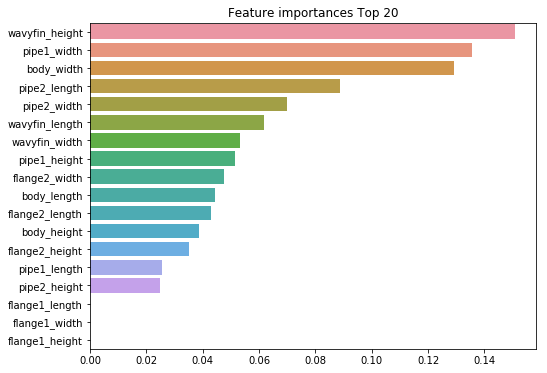

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

ftr_importances_values = dt_clf.feature_importances_

# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)

# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x = ftr_top20 , y = ftr_top20.index)
plt.show()